In [45]:
import numpy as np
import pandas as pd
import random
import os
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import gaussian_kde
import warnings
import keras
from keras.models import Sequential
from keras import layers
from keras import activations

In [2]:
X = pd.read_csv('../Project1/VoD_periodic/X.csv')
Y = pd.read_csv('../Project1/VoD_periodic/Y.csv')
print("The shape of X.csv is:")
print(X.shape)
print("The shape of Y.csv is:")
print(Y.shape)

The shape of X.csv is:
(37036, 1714)
The shape of Y.csv is:
(37036, 10)


In [3]:
X

,TimeStamp,0_all_..usr,0_all_..sys,0_all_..iowait,0_all_..soft,0_all_..idle,0_cpu0_.usr,0_cpu0_.sys,0_cpu0_.iowait,0_cpu0_.soft,...,36_RxBytes.1,36_TxBytes.1,40_RxPacktes.1,40_TxPacktes.1,40_RxBytes.1,40_TxBytes.1,41_RxPacktes.1,41_TxPacktes.1,41_RxBytes.1,41_TxBytes.1
0,2016-11-17 19:08:42,0.04,0.13,0.13,0.00,99.71,1.0,0.00,1.00,0.0,...,104466,924,59,13,89326,858,13,59,858,155934
1,2016-11-17 19:08:43,0.08,0.17,0.00,0.00,99.75,0.0,0.00,0.00,0.0,...,47828,2256,29,9,43906,594,10,29,654,74314
2,2016-11-17 19:08:44,0.08,0.21,0.04,0.00,99.67,0.0,0.00,1.01,0.0,...,42392,660,28,11,42392,726,11,28,726,71352
3,2016-11-17 19:08:45,0.13,0.17,0.08,0.00,99.62,0.0,0.00,0.00,0.0,...,38248,973,68,28,94686,2029,30,68,2393,146814
4,2016-11-17 19:08:46,0.08,0.25,0.08,0.00,99.58,1.0,0.00,1.00,0.0,...,963602,5868,630,75,945081,5369,74,631,5308,1705350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37031,2016-11-18 07:09:46,0.08,0.21,0.00,0.04,99.67,0.0,0.00,1.00,0.0,...,673922,3756,69,20,103018,1452,20,69,1452,176866
37032,2016-11-18 07:09:47,0.17,0.21,0.00,0.00,99.63,0.0,0.00,0.00,0.0,...,566376,9678,63,13,93934,990,14,63,1050,167782
37033,2016-11-18 07:09:48,0.08,0.25,0.04,0.00,99.62,0.0,0.00,1.00,0.0,...,394270,10348,116,74,114740,8664,76,115,8900,187074
37034,2016-11-18 07:09:49,0.12,0.17,0.00,0.00,99.71,0.0,0.99,0.00,0.0,...,139420,1360,39,34,3930,7276,33,40,7100,3996


In [4]:
Y

,TimeStamp,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,DispFrames,AvgInterDispDelay
0,2016-11-17 19:08:42,84,0.014553,2695,1880476,0.000606,0,0,23,0.070138
1,2016-11-17 19:08:43,42,0.024508,711,510624,0.001364,0,0,24,0.041706
2,2016-11-17 19:08:44,42,0.024569,281,162152,0.003416,0,0,24,0.041708
3,2016-11-17 19:08:45,48,0.021000,118,81056,0.007932,0,0,24,0.041708
4,2016-11-17 19:08:46,42,0.024002,69,48632,0.016347,0,0,24,0.041706
...,...,...,...,...,...,...,...,...,...,...
37031,2016-11-18 07:09:46,37,0.025945,230,113536,0.004696,0,0,24,0.041708
37032,2016-11-18 07:09:47,42,0.025147,211,113520,0.004665,0,0,24,0.041707
37033,2016-11-18 07:09:48,42,0.023425,156,97280,0.006463,0,0,24,0.041711
37034,2016-11-18 07:09:49,43,0.022346,182,89208,0.005535,0,0,24,0.041708


In [5]:
numpyX = X.drop(['TimeStamp'], axis=1).copy().to_numpy() #remove timestamp
numpyY = Y.drop(['TimeStamp'], axis=1).copy().to_numpy()

In [6]:
numpyX

array([[4.00000e-02, 1.30000e-01, 1.30000e-01, ..., 5.90000e+01,
        8.58000e+02, 1.55934e+05],
       [8.00000e-02, 1.70000e-01, 0.00000e+00, ..., 2.90000e+01,
        6.54000e+02, 7.43140e+04],
       [8.00000e-02, 2.10000e-01, 4.00000e-02, ..., 2.80000e+01,
        7.26000e+02, 7.13520e+04],
       ...,
       [8.00000e-02, 2.50000e-01, 4.00000e-02, ..., 1.15000e+02,
        8.90000e+03, 1.87074e+05],
       [1.20000e-01, 1.70000e-01, 0.00000e+00, ..., 4.00000e+01,
        7.10000e+03, 3.99600e+03],
       [1.30000e-01, 2.10000e-01, 4.00000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [7]:
newX = np.zeros((37036,16))
for i in range(37036):
    newX[i] = numpyX[i][0:16]

In [8]:
newX

array([[4.0e-02, 1.3e-01, 1.3e-01, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [8.0e-02, 1.7e-01, 0.0e+00, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [8.0e-02, 2.1e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       ...,
       [8.0e-02, 2.5e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [1.2e-01, 1.7e-01, 0.0e+00, ..., 1.0e+02, 0.0e+00, 0.0e+00],
       [1.3e-01, 2.1e-01, 4.0e-02, ..., 1.0e+02, 0.0e+00, 0.0e+00]])

In [7]:
newY = np.zeros((37036,1))
for i in range(37036):
    newY[i] = numpyY[i][7]

In [8]:
newY

array([[23.],
       [24.],
       [24.],
       ...,
       [24.],
       [24.],
       [24.]])

### Data pre-processing

In [9]:
# standardization in samples
def stdColumn(raw):
    stdColumnX = np.zeros(raw.T.shape)
    for i in range(raw.T.shape[0]):
        stdColumnX[i] = preprocessing.scale(raw.T[i])
    stdColumnX = stdColumnX.T
    return stdColumnX

In [10]:
newX = stdColumn(numpyX)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [11]:
#Verifycation of standardization
stdCorrect = 1
for i in newX.T:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("Standardization in column is correct.")

Standardization in column is correct.


### Outlier removal

In [12]:
listDelete =[]
thresholdNew = 57.5
for i in range(newX.shape[0]):
    if abs(np.max(newX[i])) > thresholdNew or abs(np.min(newX[i])) > thresholdNew:
        listDelete.append(i)

In [13]:
len(listDelete) / newX.shape[0] #1% data with largest absolute values are treated as outliers and removed

0.010017280483853547

In [15]:
dataSetX = np.delete(newX, listDelete, 0)
dataSetY = np.delete(newY, listDelete, 0)

### Feature selection

In [16]:
def featureSelection(X, Y, numFeature):
    clf = RandomForestRegressor(n_estimators=10)
    clf.fit(X, Y)
    model = SelectFromModel(clf, prefit=True, max_features = numFeature, threshold=-np.inf)
    newX = model.transform(X)
    return newX

In [19]:
dataSetY = np.ravel(dataSetY)

In [20]:
dataSetX = featureSelection(dataSetX, dataSetY, 16)

### Data preparation

In [21]:
def dataPrepare(step, l, h, X, Y):
    interval = step - 1
    trainsX, testsX, trainsY, testsY = train_test_split(X, Y, train_size = 0.7, shuffle = False)
    length = l * interval + l + 1 + h * interval + h
    numberTrain = trainsX.shape[0] - length + 1
    numberTest = testsX.shape[0] - length + 1
    trainX = np.zeros((numberTrain, 16*(l+1)))
    testX = np.zeros((numberTest, 16*(l+1)))
    trainY = np.zeros((numberTrain, 1*(h+1)))
    testY = np.zeros((numberTest, 1*(h+1)))
    trainX = assembleX(trainsX, trainX, interval, l)    
    testX = assembleX(testsX, testX, interval, l) 
    trainY = assembleY(trainsY, trainY, interval, h, l)    
    testY = assembleY(testsY, testY, interval, h, l)
    return(trainX, testX, trainY, testY)

In [22]:
def assembleX(arrays, newarrays, interval, numbers):
    for i in range(newarrays.shape[0]):
        newarray = arrays[i]
        for j in range(numbers):
            newarray = np.concatenate((newarray, arrays[i+(j+1)*interval+j+1]),axis=0)
        newarrays[i] = newarray
    return newarrays

In [23]:
def assembleY(arrays, newarrays, interval, numbers, l):
    for i in range(newarrays.shape[0]):
        newarray = arrays[i+l*interval+l]
        for j in range(numbers):
            newarray = np.concatenate((newarray, arrays[i+l*interval+l+(j+1)*interval+j+1]),axis=0)
        newarrays[i] = newarray
    return newarrays

In [31]:
newYs = np.zeros((dataSetY.shape[0], 1))

In [32]:
for i in range(dataSetY.shape[0]):
    newYs[i] = dataSetY[i]
dataSetY = newYs

In [33]:
trainX, testX, trainY, testY = dataPrepare(300, 2, 3, dataSetX, dataSetY)

In [41]:
testY

array([[24., 24., 24., 24.],
       [24., 24., 24., 24.],
       [24., 24., 24., 24.],
       ...,
       [24., 24., 24., 24.],
       [24., 24., 24., 24.],
       [24., 24., 24., 24.]])

### Linear forecasting

In [42]:
def calError(real, pred):
    return mean_absolute_error(pred, real)/real.mean()

In [43]:
tableNMAE = np.zeros((11,11))

In [52]:
for l in range(11):
    for h in range(11):
        trainX, testX, trainY, testY = dataPrepare(300, l, h, dataSetX, dataSetY)
        linearPred = LinearRegression()
        linearPred.fit(trainX, trainY)
        predY = linearPred.predict(testX)
        tableNMAE[l][h] = np.round(calError(testY, predY), 3)

In [47]:
tableNMAE

array([[0.1032732 , 0.10860364, 0.11750069, 0.11999751, 0.11971586,
        0.11982313, 0.12104889, 0.12331779, 0.12451531, 0.12405426,
        0.12177678],
       [0.10204454, 0.1052667 , 0.10729437, 0.10965877, 0.11274291,
        0.11561399, 0.11756636, 0.11833916, 0.11812902, 0.11672156,
        0.11514806],
       [0.10716147, 0.10776366, 0.10989345, 0.11333708, 0.11616227,
        0.11861802, 0.11962617, 0.11973292, 0.11851187, 0.1167272 ,
        0.1152157 ],
       [0.10811082, 0.11008955, 0.11312695, 0.11715004, 0.11965955,
        0.1209573 , 0.12106569, 0.12013023, 0.11830637, 0.11676466,
        0.11566658],
       [0.11124731, 0.11357133, 0.1169824 , 0.12066949, 0.12152463,
        0.12179328, 0.12087731, 0.11942726, 0.11857993, 0.1174782 ,
        0.11677624],
       [0.11407375, 0.11737829, 0.12049122, 0.12239963, 0.1217456 ,
        0.12100087, 0.1197029 , 0.11927795, 0.11932822, 0.11863537,
        0.11796439],
       [0.11830634, 0.12142354, 0.12178692, 0.12201432, 0.

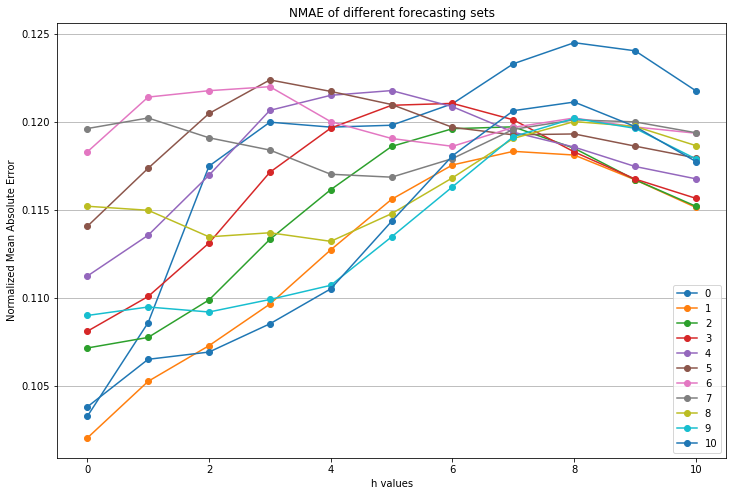

In [51]:
figure(figsize=(12, 8))
valuesH = np.arange(11)
for i in range(11):
    plt.plot(valuesH, tableNMAE[i], '-o', label = str(i))
plt.xlabel('h values')
plt.ylabel('Normalized Mean Absolute Error')
plt.legend()
plt.title('NMAE of different forecasting sets')
plt.grid()
plt.grid(axis='x')
plt.show()